**Online_Shoppers_Intention**

**Source: UCI Machine Learning Repository.**

**Link: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset**

**Target Column: "Revenue"**

#importing libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [12]:
df=pd.read_csv("online_shoppers_intention.csv")

In [13]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [14]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [16]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [17]:
df.duplicated().sum()

125

In [18]:
df1=df.drop_duplicates()

In [19]:
df1

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [20]:
df1.duplicated().sum()

0

In [21]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


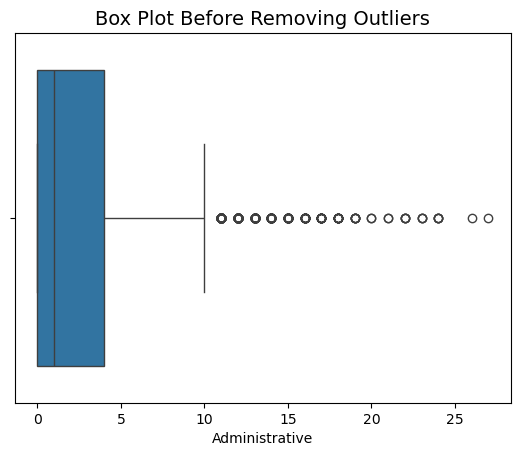

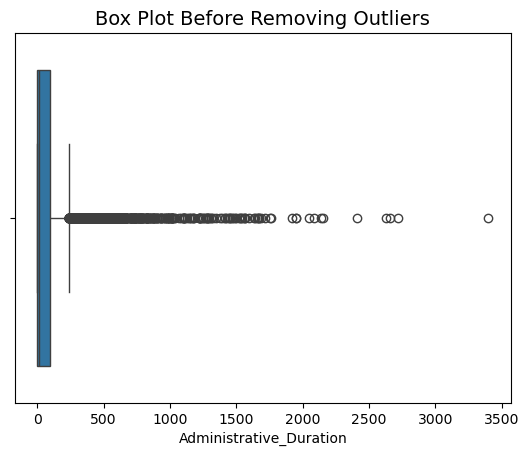

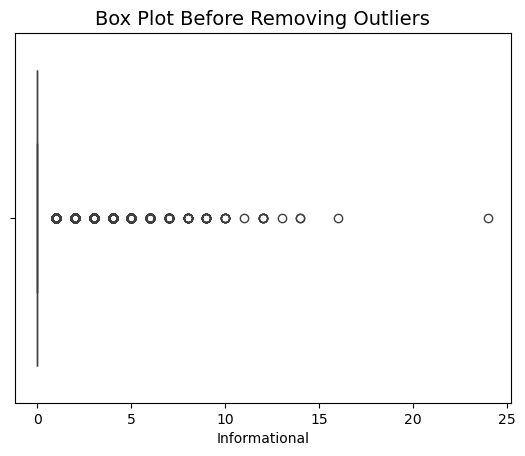

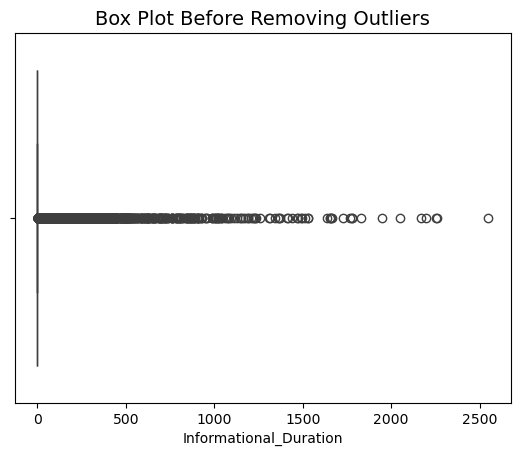

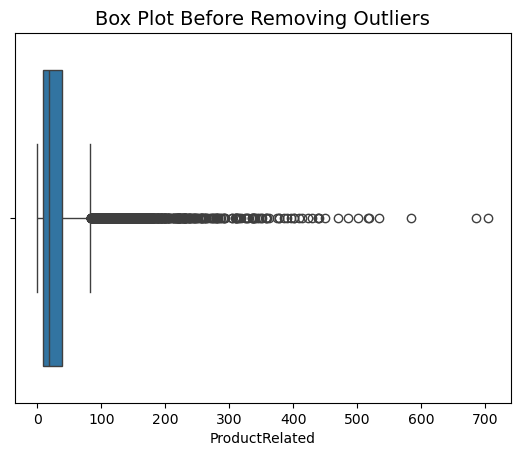

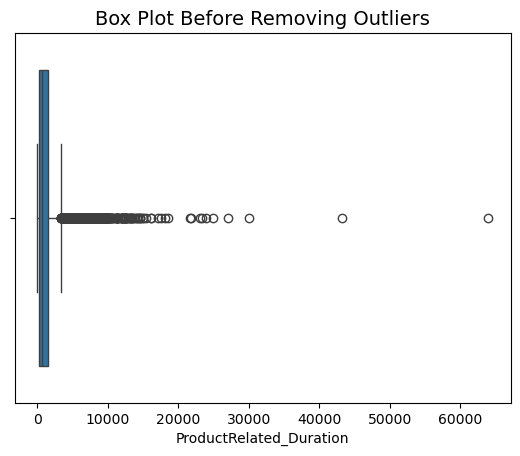

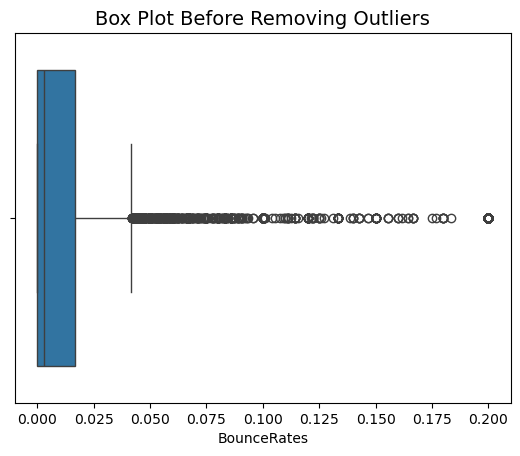

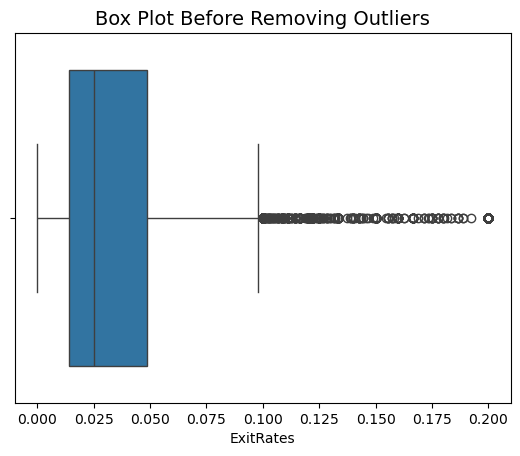

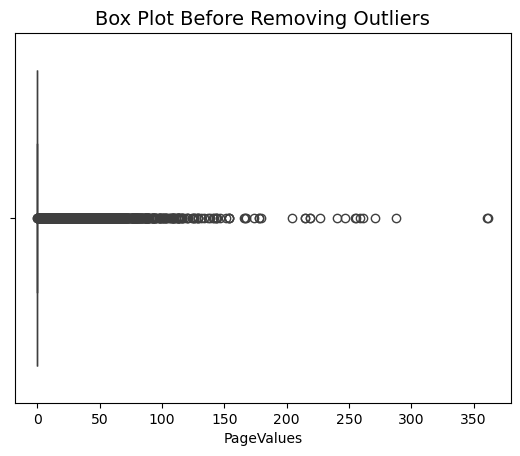

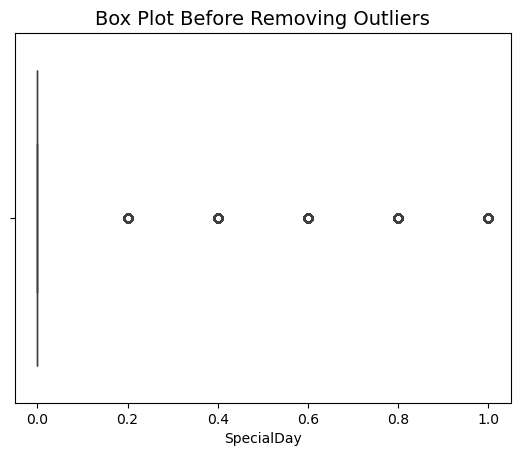

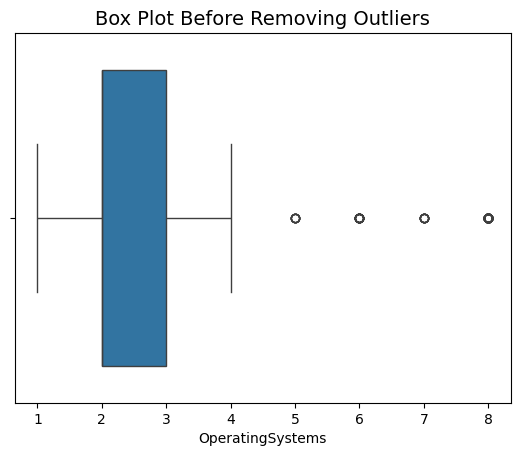

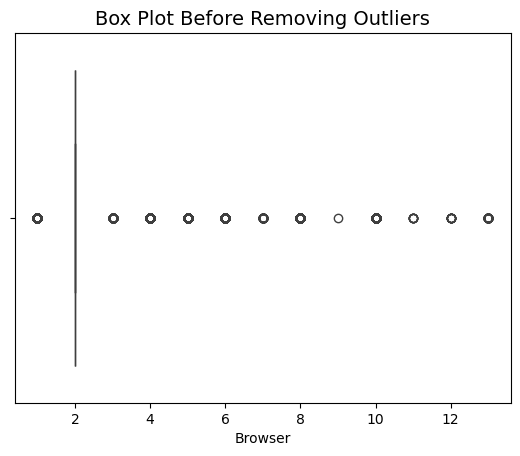

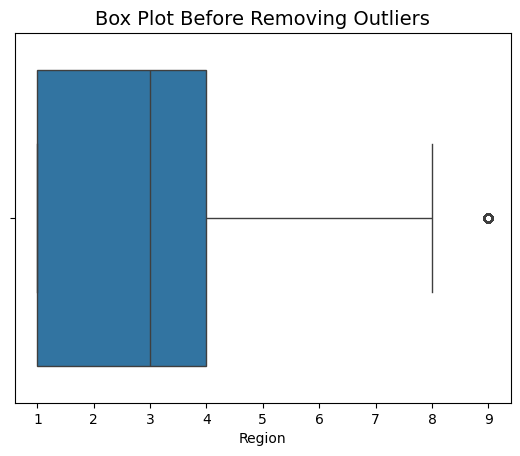

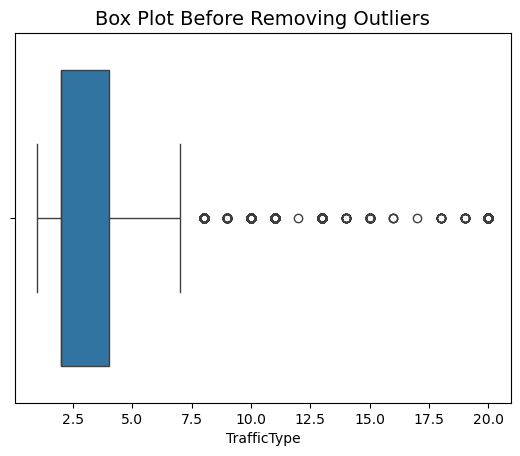

In [33]:
for i in df1.select_dtypes(include="number").columns:
    sns.boxplot(data=df1,x=i)
    plt.title("Box Plot Before Removing Outliers", fontsize=14)
    plt.show()

**VISUALIZATIONS USING MATPLOTLIB AND SEABORN**


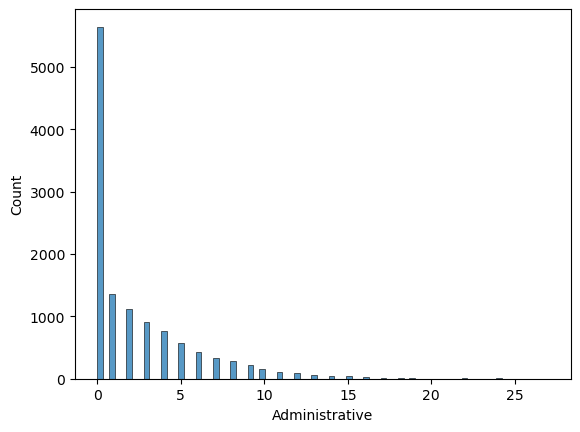

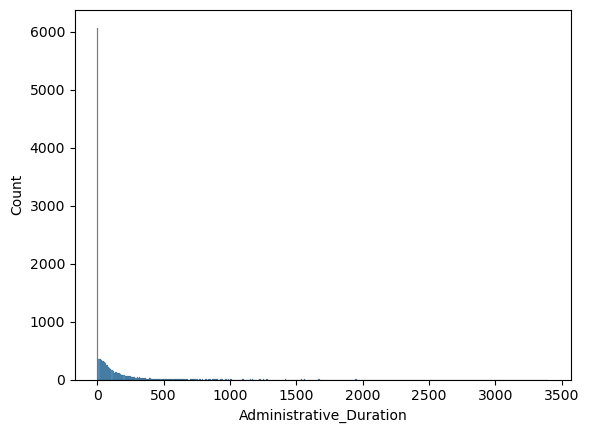

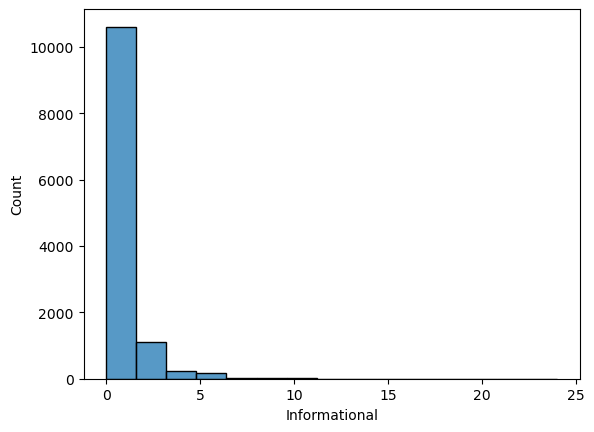

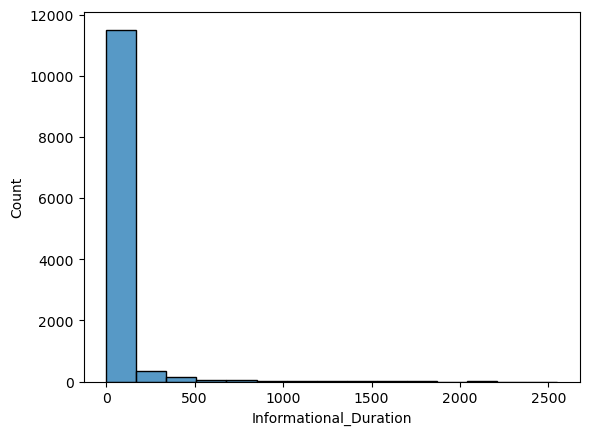

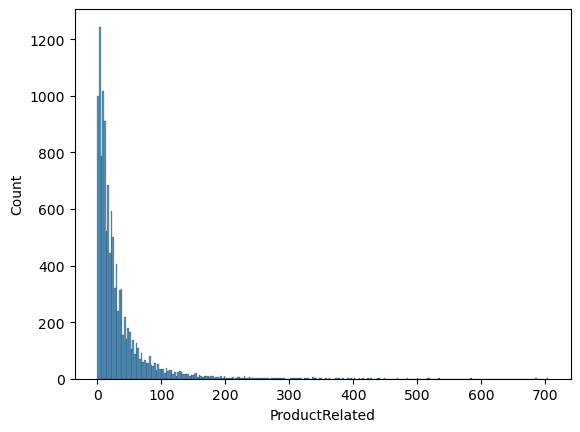

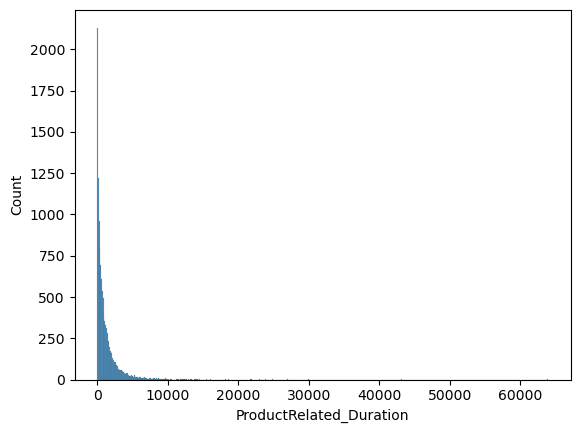

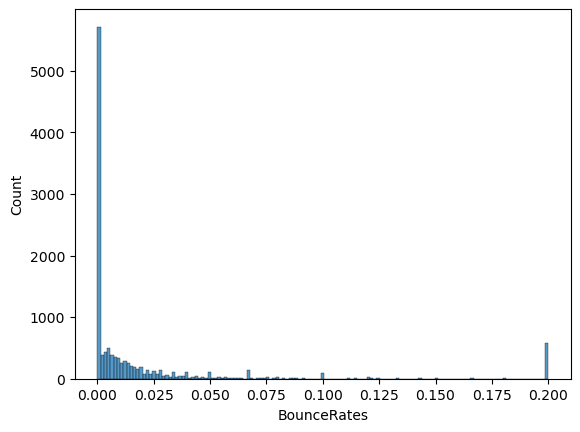

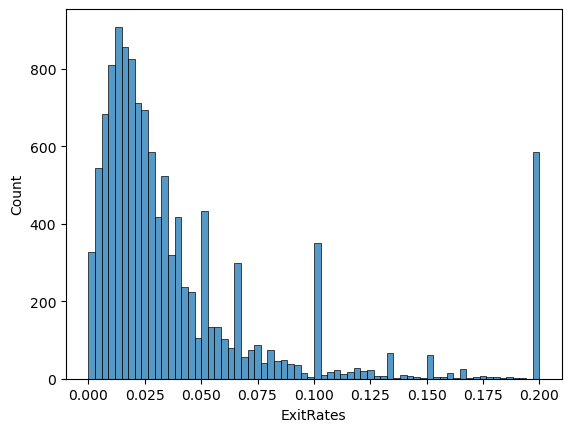

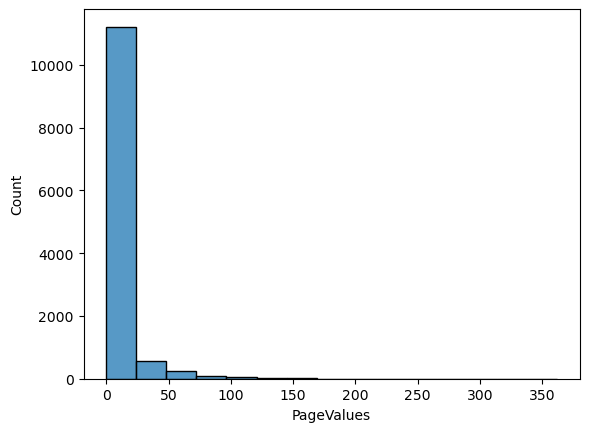

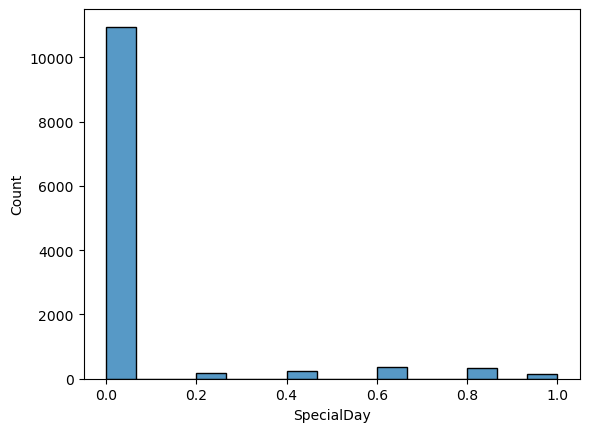

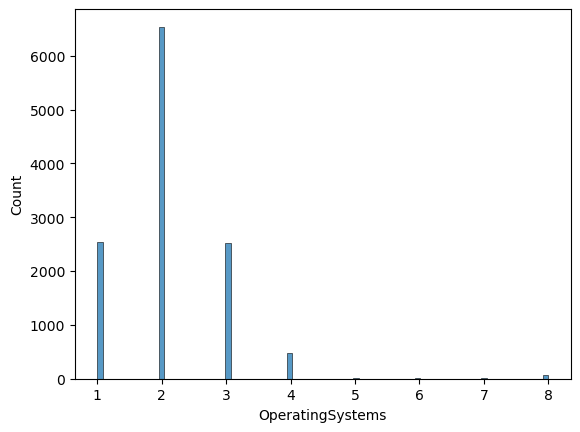

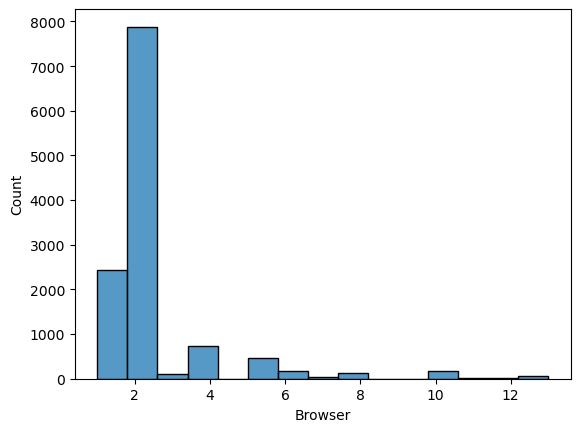

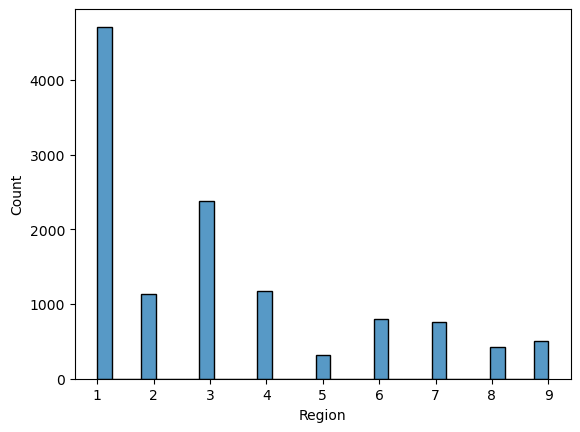

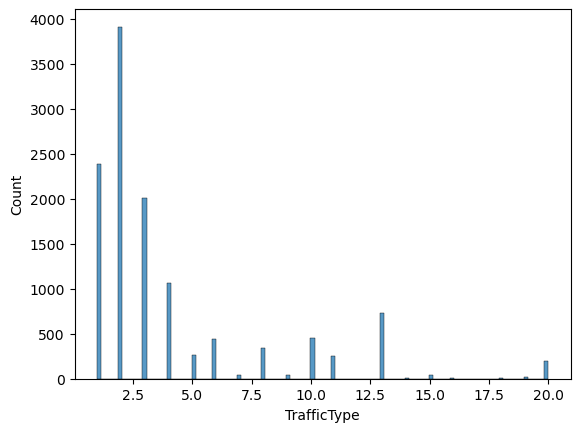

In [13]:
for i in df1.select_dtypes(include="number").columns:
    sns.histplot(data=df1,x=i)
    plt.show()

In [14]:
df1.select_dtypes(include="number").columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

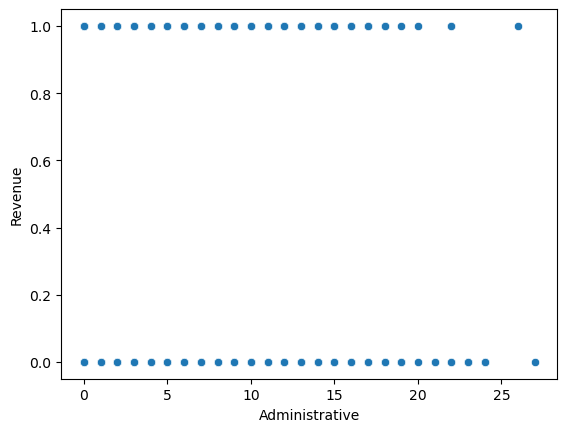

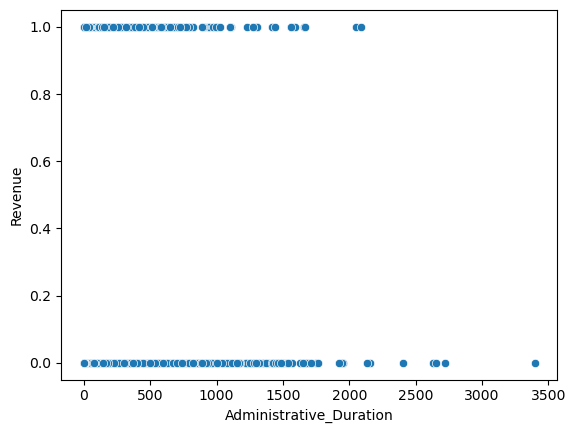

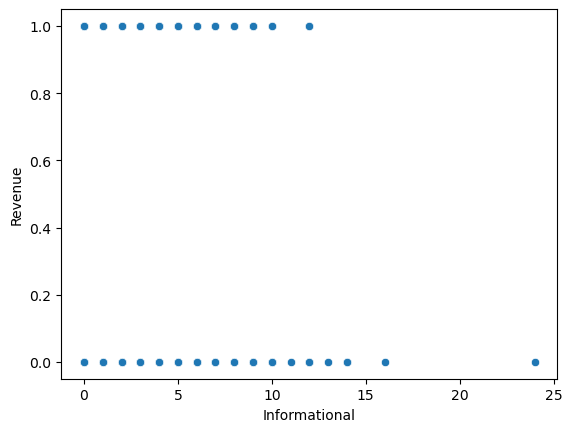

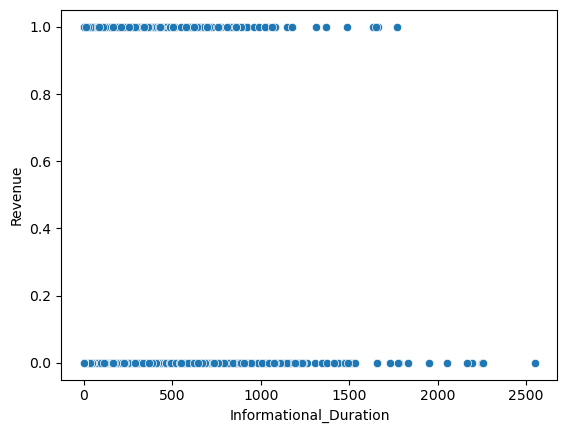

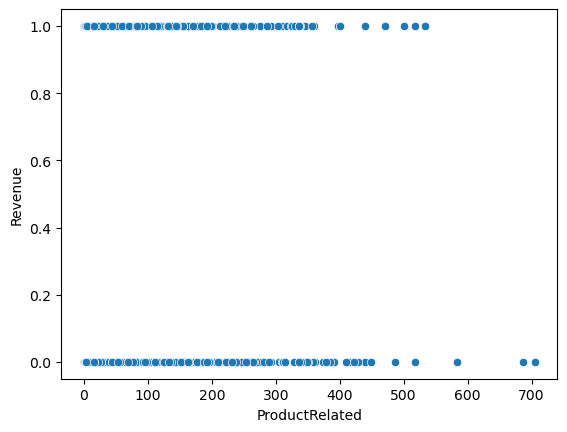

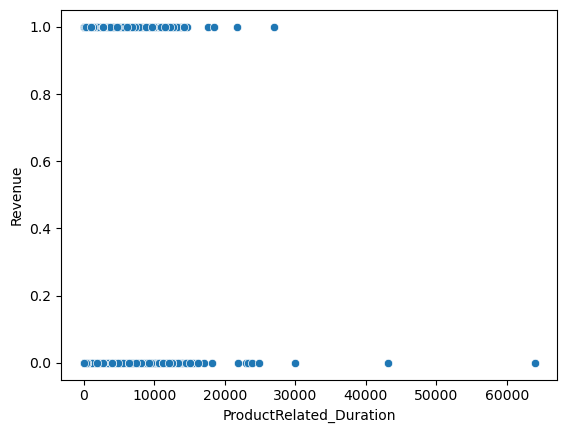

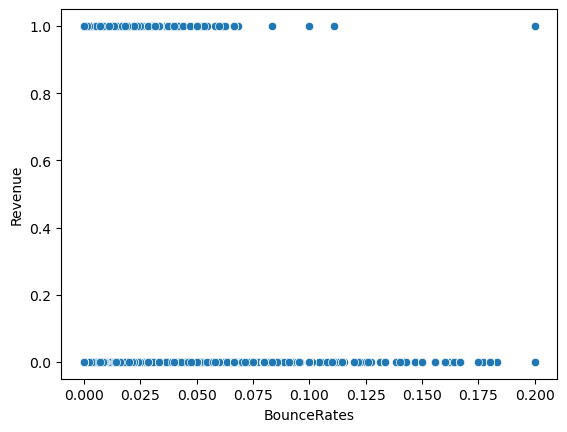

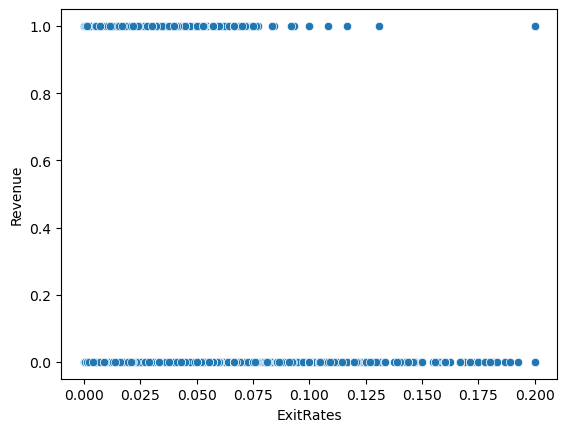

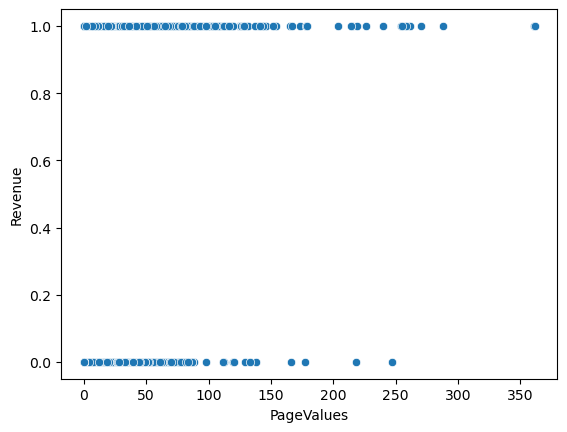

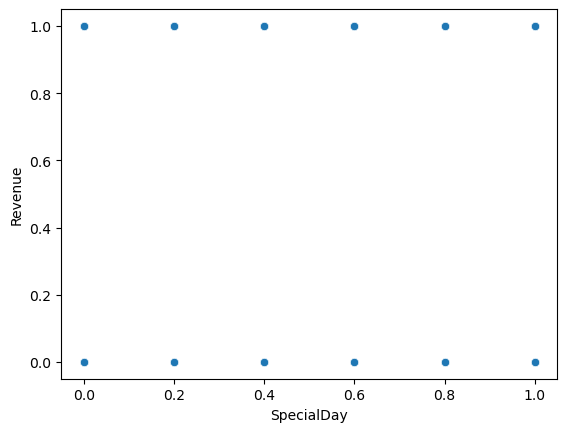

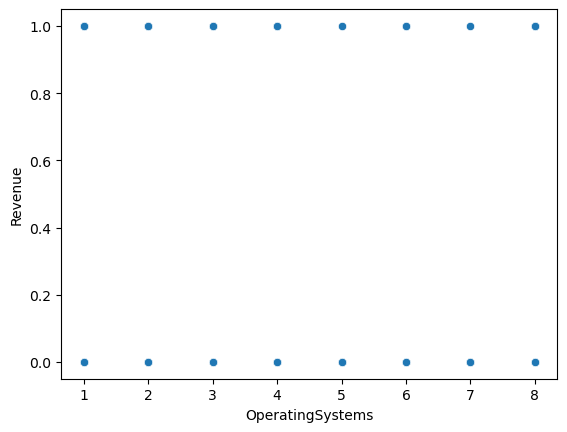

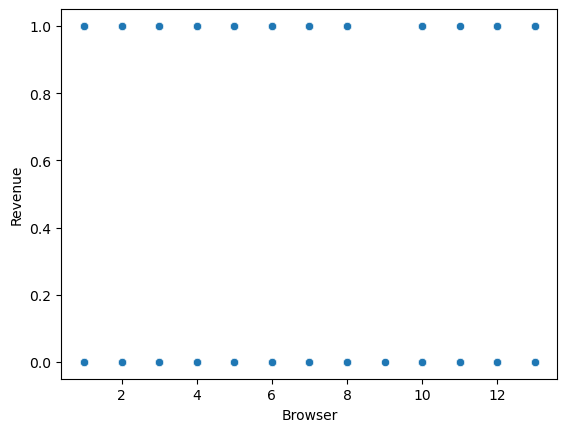

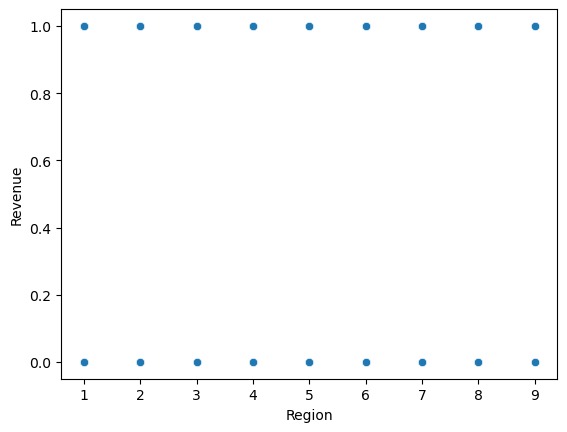

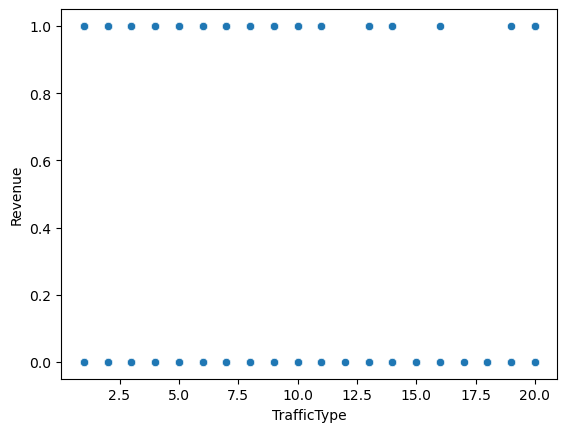

In [15]:
for i in ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']:

    sns.scatterplot(data=df,x=i,y= 'Revenue')
    plt.show()

In [16]:
s = df1.select_dtypes(include="number").corr()

<Axes: >

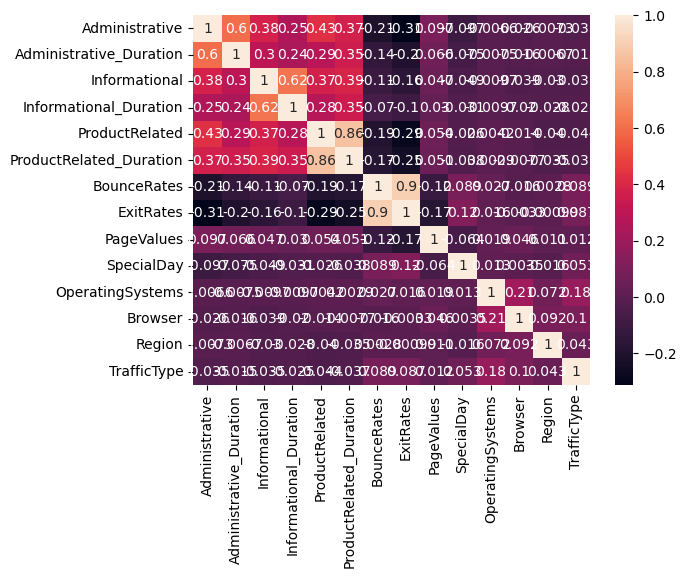

In [17]:
sns.heatmap(s,annot=True)

In [18]:
df1.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**HANDLING OUTLIERS**

In [19]:
def remove_outliers_iqr(df1, columns):
    for col in columns:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
    return df

In [20]:
numerical_columns =['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType']

In [21]:
df_cleaned = remove_outliers_iqr(df1, numerical_columns)


print("\nShape of the dataset before removing outliers:", df.shape)
print("Shape of the dataset after removing outliers:", df_cleaned.shape)


Shape of the dataset before removing outliers: (12330, 18)
Shape of the dataset after removing outliers: (10121, 18)


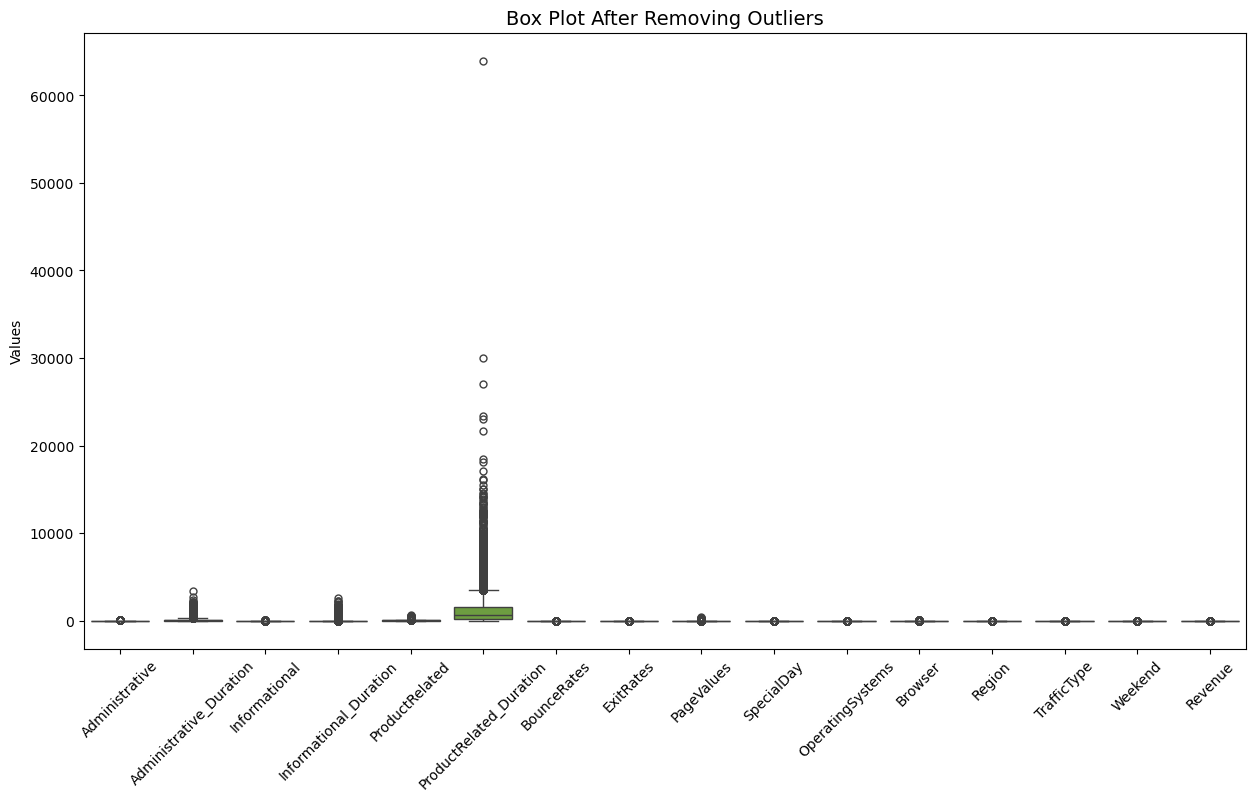

In [22]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned,flierprops={'marker':'o','color':'red','markersize':5})
plt.title("Box Plot After Removing Outliers", fontsize=14)
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10121 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           10121 non-null  int64  
 1   Administrative_Duration  10121 non-null  float64
 2   Informational            10121 non-null  int64  
 3   Informational_Duration   10121 non-null  float64
 4   ProductRelated           10121 non-null  int64  
 5   ProductRelated_Duration  10121 non-null  float64
 6   BounceRates              10121 non-null  float64
 7   ExitRates                10121 non-null  float64
 8   PageValues               10121 non-null  float64
 9   SpecialDay               10121 non-null  float64
 10  Month                    10121 non-null  object 
 11  OperatingSystems         10121 non-null  int64  
 12  Browser                  10121 non-null  int64  
 13  Region                   10121 non-null  int64  
 14  TrafficType              10

**Data Encoding**

In [24]:
df_encoded= pd.get_dummies(df_cleaned, drop_first=True) 
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [25]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10121 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 10121 non-null  int64  
 1   Administrative_Duration        10121 non-null  float64
 2   Informational                  10121 non-null  int64  
 3   Informational_Duration         10121 non-null  float64
 4   ProductRelated                 10121 non-null  int64  
 5   ProductRelated_Duration        10121 non-null  float64
 6   BounceRates                    10121 non-null  float64
 7   ExitRates                      10121 non-null  float64
 8   PageValues                     10121 non-null  float64
 9   SpecialDay                     10121 non-null  float64
 10  OperatingSystems               10121 non-null  int64  
 11  Browser                        10121 non-null  int64  
 12  Region                         10121 non-null  int6

In [26]:
df_encoded = df_encoded.dropna()


In [27]:
df=df_encoded


**STANDARD SCALAR**

In [28]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
X=X.select_dtypes(include=['number'])
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)
df_standard = pd.DataFrame(X_standard_scaled, columns=X.columns)

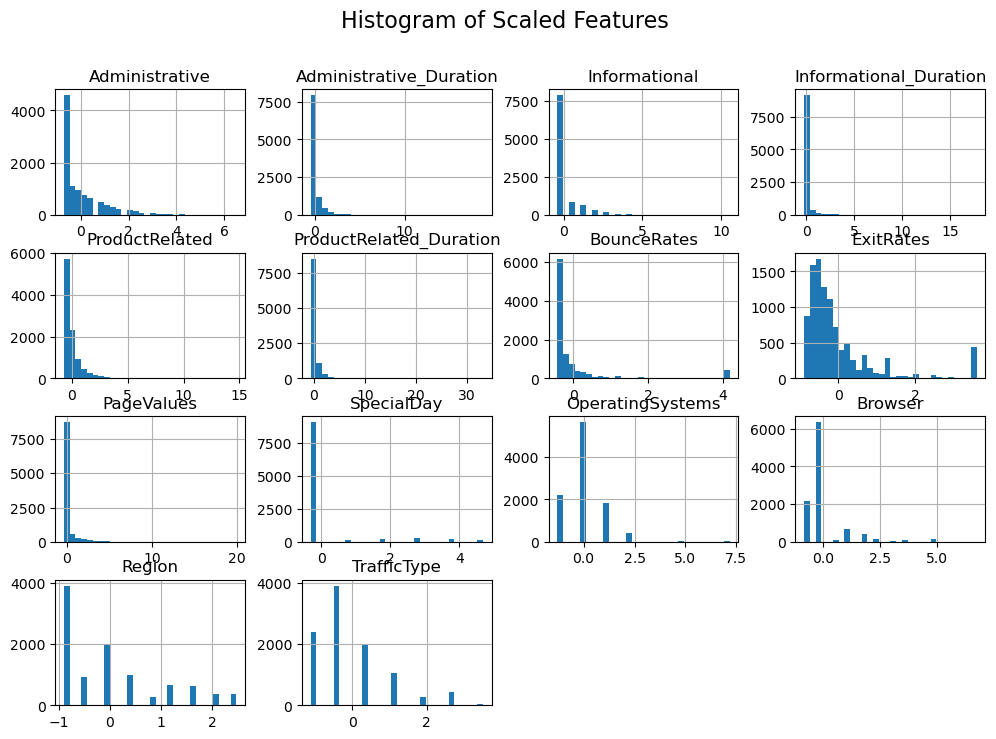

In [31]:
df_standard.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histogram of Scaled Features", fontsize=16)
plt.show()

**TRAIN TEST SPLIT**

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Revenue'])  # Target column: "Revenue"
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Data Shape:",X_train.shape)
print("Test Data Shape:",X_test.shape)

Train Data Shape: (8096, 26)
Test Data Shape: (2025, 26)


**Models**

In [71]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

print("KNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8498765432098765
KNN Precision: 0.8260583306276189
KNN Recall: 0.8498765432098765
KNN Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.96      0.91      1689
        True       0.60      0.28      0.38       336

    accuracy                           0.85      2025
   macro avg       0.74      0.62      0.65      2025
weighted avg       0.83      0.85      0.83      2025



In [73]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')


In [75]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

In [77]:
print("KNN Results:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Results:
Accuracy: 0.8498765432098765
Precision: 0.8260583306276189
Recall: 0.8498765432098765
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.96      0.91      1689
        True       0.60      0.28      0.38       336

    accuracy                           0.85      2025
   macro avg       0.74      0.62      0.65      2025
weighted avg       0.83      0.85      0.83      2025



In [79]:
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))



Logistic Regression Results:
Accuracy: 0.8770370370370371
Precision: 0.8668014324446817
Recall: 0.8770370370370371
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.98      0.93      1689
        True       0.77      0.37      0.50       336

    accuracy                           0.88      2025
   macro avg       0.83      0.67      0.72      2025
weighted avg       0.87      0.88      0.86      2025



In [81]:
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.8972839506172839
Precision: 0.8902354592847341
Recall: 0.8972839506172839
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.97      0.94      1689
        True       0.77      0.54      0.64       336

    accuracy                           0.90      2025
   macro avg       0.84      0.75      0.79      2025
weighted avg       0.89      0.90      0.89      2025



In [83]:
models = ['KNN', 'Logistic Regression', 'Random Forest']
accuracy_scores = [accuracy_knn, accuracy_log_reg, accuracy_rf]
precision_scores = [precision_knn, precision_log_reg, precision_rf]
recall_scores = [recall_knn, recall_log_reg, recall_rf]

**BAR PLOT**

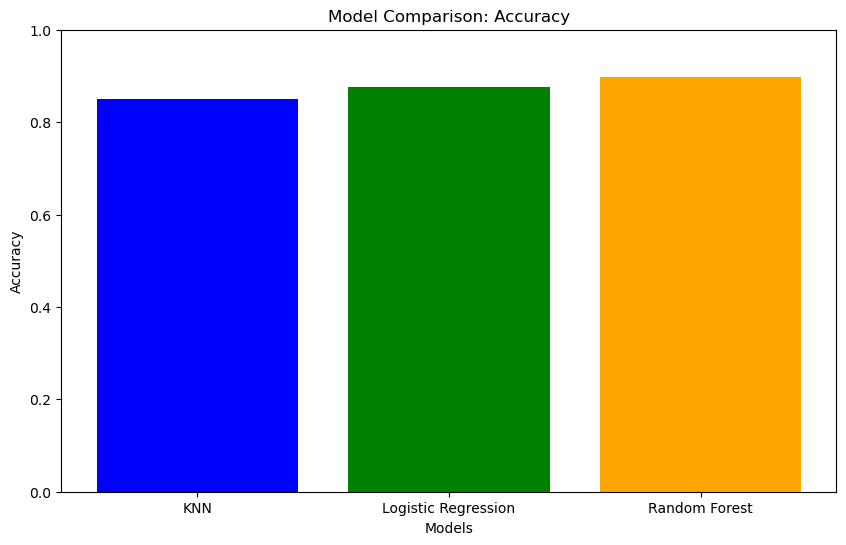

In [86]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.ylim(0, 1.0)
plt.show()

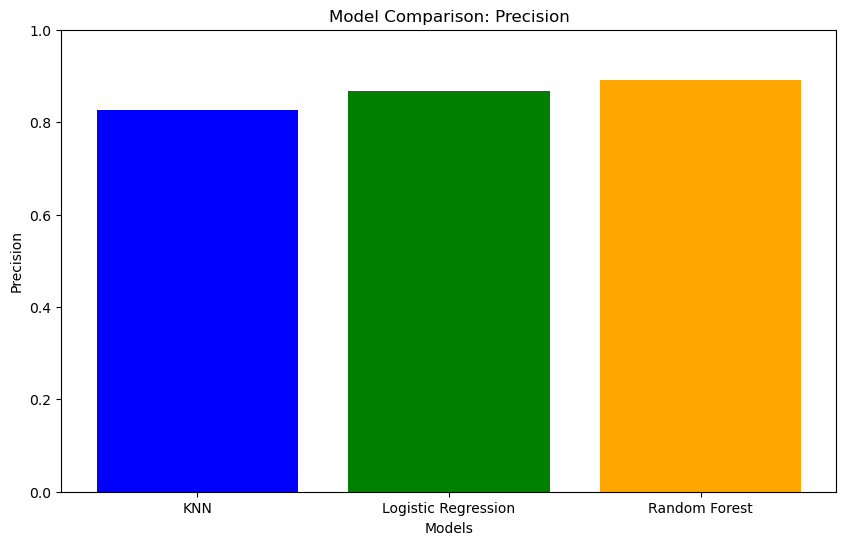

In [88]:
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Model Comparison: Precision')
plt.ylim(0, 1.0)
plt.show()

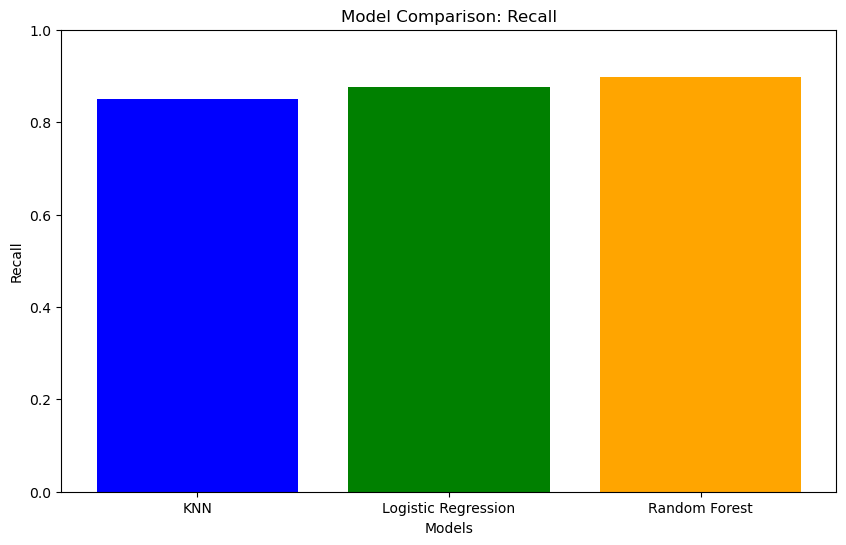

In [90]:
plt.figure(figsize=(10, 6))
plt.bar(models, recall_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Model Comparison: Recall')
plt.ylim(0, 1.0)
plt.show()

**Best model**

In [93]:
average_scores = {
    'KNN': (accuracy_knn + precision_knn + recall_knn) / 3,
    'Logistic Regression': (accuracy_log_reg + precision_log_reg + recall_log_reg) / 3,
    'Random Forest': (accuracy_rf + precision_rf + recall_rf) / 3
}

best_model = max(average_scores, key=average_scores.get)
best_score = average_scores[best_model]

print("\nAverage Scores for Each Model:")
for model, score in average_scores.items():
    print(f"{model}: {score:.4f}")

print(f"\nThe best model is {best_model} with an average score of {best_score:.4f}")


Average Scores for Each Model:
KNN: 0.8419
Logistic Regression: 0.8736
Random Forest: 0.8949

The best model is Random Forest with an average score of 0.8949
